In [ ]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# get the dataset
def get_dataset():
	X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
	return X, y

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# make a prediction on the test set
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		# calculate accuracy
		acc = accuracy_score(y_test, yhat)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results

# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [ ]:
# use mlp for prediction on multi-label classification
from numpy import asarray
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense

# get the dataset
def get_dataset():
	X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
	return X, y

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

# load dataset
X, y = get_dataset()
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, y, verbose=0, epochs=100)
# make a prediction for new data
row = [3, 3, 6, 7, 8, 2, 11, 11, 1, 3]
newX = asarray([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])

In [ ]:

# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
# define dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize first few examples
for i in range(10):
	print(X[i], y[i])

In [6]:

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [7]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# make a prediction on the test set
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		# calculate accuracy
		acc = accuracy_score(y_test, yhat)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results

In [ ]:
# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [ ]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Dataset class for PyTorch
class MultiLabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(n_inputs, 20)
        self.output = nn.Linear(20, n_outputs)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Evaluate the model using repeated k-fold cross-validation
def evaluate_model(X, y, n_splits=10, n_repeats=3, epochs=100, batch_size=32):
    results = []
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    
    # Define evaluation procedure
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    
    # Enumerate folds
    for train_ix, test_ix in cv.split(X):
        # Prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        
        # Create datasets and loaders
        train_dataset = MultiLabelDataset(X_train, y_train)
        test_dataset = MultiLabelDataset(X_test, y_test)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        
        # Define model, loss, and optimizer
        model = MLP(n_inputs, n_outputs)
        criterion = nn.BCELoss()  # Binary cross-entropy loss
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        # Train the model
        for epoch in range(epochs):
            model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                loss.backward()
                optimizer.step()
        
        # Evaluate the model
        model.eval()
        yhat_list, ytrue_list = [], []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                yhat = model(X_batch)
                yhat = (yhat > 0.5).float()  # Round probabilities to class labels
                yhat_list.append(yhat.numpy())
                ytrue_list.append(y_batch.numpy())
        
        # Calculate accuracy
        yhat = np.vstack(yhat_list)
        ytrue = np.vstack(ytrue_list)
        acc = accuracy_score(ytrue, yhat)
        print('>%.3f' % acc)
        results.append(acc)
    
    return results

# Load dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)

# Evaluate model
results = evaluate_model(X, y)
# Summarize performance
print('Accuracy: %.3f (%.3f)' % (np.mean(results), np.std(results)))


In [ ]:
import os
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

# Dataset class for images and labels
class ImageDataset(Dataset):
    def __init__(self, image_dir, label_file, image_size=(128, 128)):
        self.image_dir = image_dir
        self.labels = self.load_labels(label_file)
        self.image_size = image_size
        self.image_files = sorted(os.listdir(image_dir))  # Ensure the order matches labels
    
    def load_labels(self, label_file):
        # Load labels from file (one-hot encoded or binary format expected)
        with open(label_file, 'r') as file:
            labels = [list(map(int, line.strip().split())) for line in file]
        return torch.tensor(labels, dtype=torch.float32)
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert('RGB')
        image = image.resize(self.image_size)
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # (H, W, C) -> (C, H, W)
        # Load corresponding label
        label = self.labels[idx]
        return image, label

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, n_outputs):
        super(MLP, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 64 * 64, 128)  # Adjust for image_size=(128, 128)
        self.fc2 = nn.Linear(128, n_outputs)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    yhat_list, ytrue_list = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            yhat = (outputs > 0.5).float()  # Convert probabilities to binary
            yhat_list.append(yhat.numpy())
            ytrue_list.append(labels.numpy())
    yhat = np.vstack(yhat_list)
    ytrue = np.vstack(ytrue_list)
    acc = accuracy_score(ytrue, yhat)
    print(f"Accuracy: {acc:.3f}")
    return acc

# Paths to data
train_image_dir = "../data/images/train"
train_label_file = "../data/attribute_matrix_train.txt"
test_image_dir = "../data/images/test"
test_label_file = "../data/attribute_matrix_test.txt"

# Hyperparameters
image_size = (128, 128)
n_labels = 312
batch_size = 32
epochs = 10
learning_rate = 0.001

# Prepare datasets and dataloaders
train_dataset = ImageDataset(train_image_dir, train_label_file, image_size)
test_dataset = ImageDataset(test_image_dir, test_label_file, image_size)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss, and optimizer
model = MLP(n_outputs=n_labels)
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs)

# Evaluate the model
evaluate_model(model, test_loader)


In [1]:
import os
import glob
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score

# Dataset class for images and labels
class ImageDataset(Dataset):
    def __init__(self, image_dir, label_file, image_size=(128, 128)):
        self.image_size = image_size
        self.image_paths = self.get_image_paths(image_dir)
        self.labels = self.load_labels(label_file)
        
        # Ensure the number of images matches the number of labels
        assert len(self.image_paths) == len(self.labels), "Mismatch between images and labels."
    
    def get_image_paths(self, image_dir):
        # Recursively gather all image paths in subfolders
        image_paths = glob.glob(os.path.join(image_dir, "**", "*.jpg"), recursive=True)
        return sorted(image_paths)  # Sort to ensure consistent order
    
    def load_labels(self, label_file):
        # Load labels from file (one-hot encoded or binary format expected)
        with open(label_file, 'r') as file:
            labels = [list(map(int, line.strip().split())) for line in file]
        return torch.tensor(labels, dtype=torch.float32)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Load image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = image.resize(self.image_size)
        image = np.array(image) / 255.0  # Normalize to [0, 1]
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # (H, W, C) -> (C, H, W)
        # Load corresponding label
        label = self.labels[idx]
        return image, label

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, n_outputs):
        super(MLP, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 64 * 64, 128)  # Adjust for image_size=(128, 128)
        self.fc2 = nn.Linear(128, n_outputs)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

# Evaluation function with prediction output
def evaluate_model_with_predictions(model, test_loader):
    model.eval()
    yhat_list, ytrue_list, filenames = [], [], []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)  # Get probabilities
            yhat = (outputs > 0.5).float()  # Threshold probabilities to get binary predictions
            yhat_list.append(yhat.numpy())  # Collect predictions
            ytrue_list.append(labels.numpy())  # Collect true labels
    yhat = np.vstack(yhat_list)
    ytrue = np.vstack(ytrue_list)
    acc = accuracy_score(ytrue, yhat)
    print(f"Accuracy: {acc:.3f}")
    return yhat, ytrue
'''
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    yhat_list, ytrue_list = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            yhat = (outputs > 0.5).float()  # Convert probabilities to binary
            yhat_list.append(yhat.numpy())
            ytrue_list.append(labels.numpy())
    yhat = np.vstack(yhat_list)
    ytrue = np.vstack(ytrue_list)
    acc = accuracy_score(ytrue, yhat)
    print(f"Accuracy: {acc:.3f}")
    return acc
'''
# Paths to data
train_image_dir = "../data/images/train"
train_label_file = "../data/attribute_matrix_train.txt"
test_image_dir = "../data/images/test"
test_label_file = "../data/attribute_matrix_test.txt"

# Hyperparameters
image_size = (128, 128)
n_labels = 312
batch_size = 32
epochs = 5
learning_rate = 0.001

# Prepare datasets and dataloaders
train_dataset = ImageDataset(train_image_dir, train_label_file, image_size)
test_dataset = ImageDataset(test_image_dir, test_label_file, image_size)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss, and optimizer
model = MLP(n_outputs=n_labels)
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs)
# Make predictions on the test dataset
yhat, ytrue = evaluate_model_with_predictions(model, test_loader)


'''
# Evaluate the model
evaluate_model(model, test_loader)
'''

Epoch 1/5, Loss: 0.3067
Epoch 2/5, Loss: 0.2550
Epoch 3/5, Loss: 0.2498
Epoch 4/5, Loss: 0.2432
Epoch 5/5, Loss: 0.2343
Accuracy: 0.000
Image 1:
Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual:    [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

'\n# Evaluate the model\nevaluate_model(model, test_loader)\n'

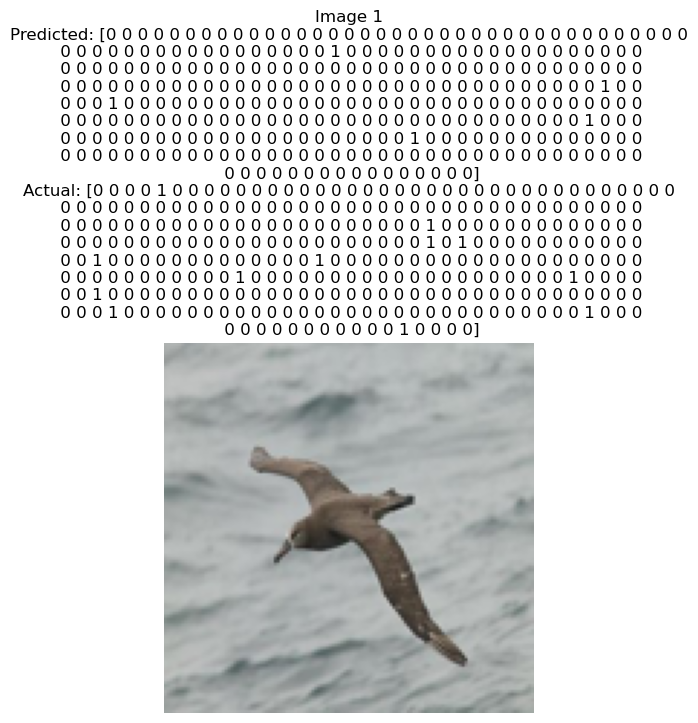

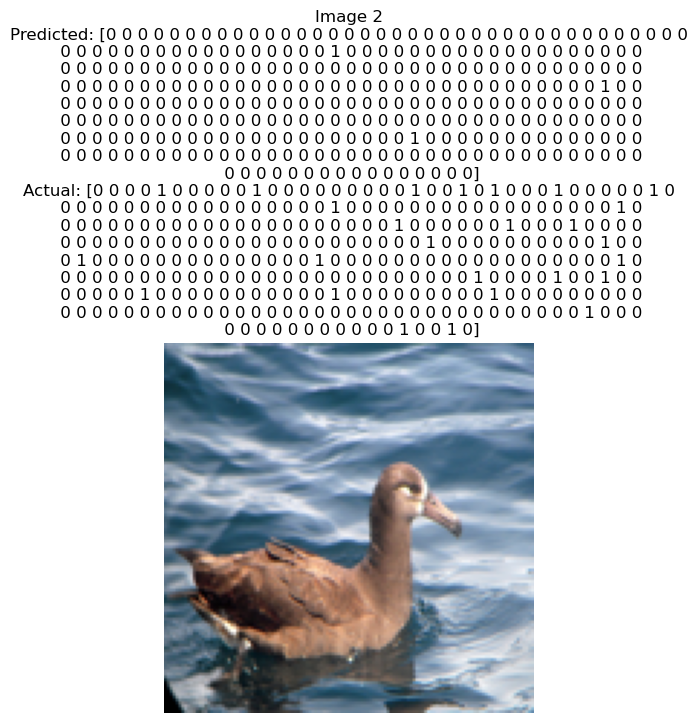

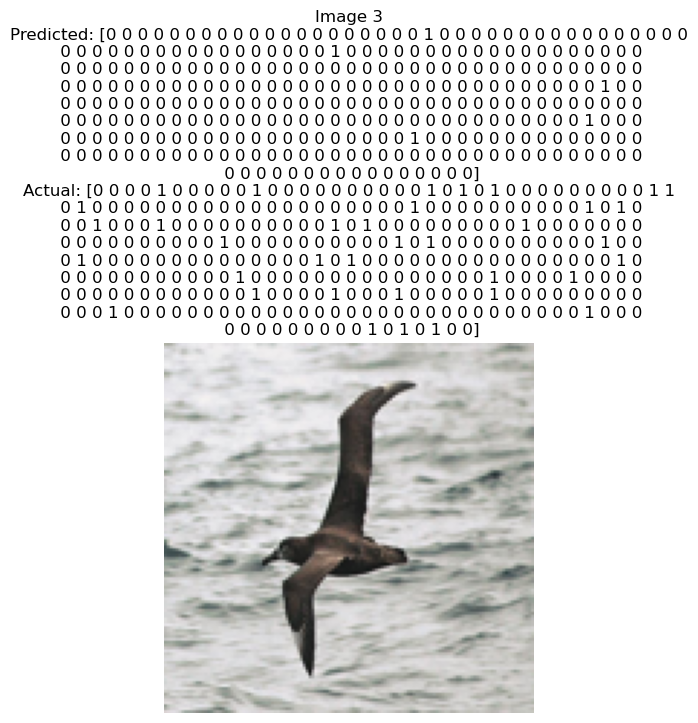

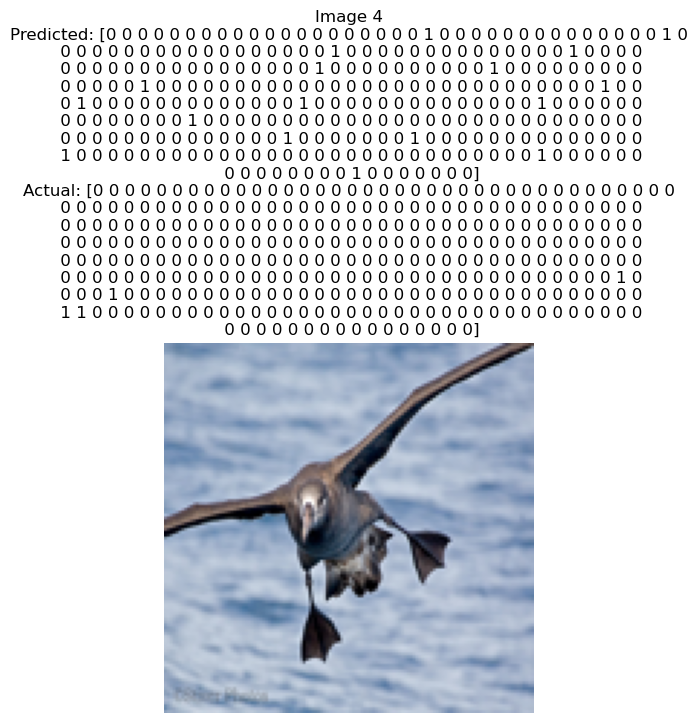

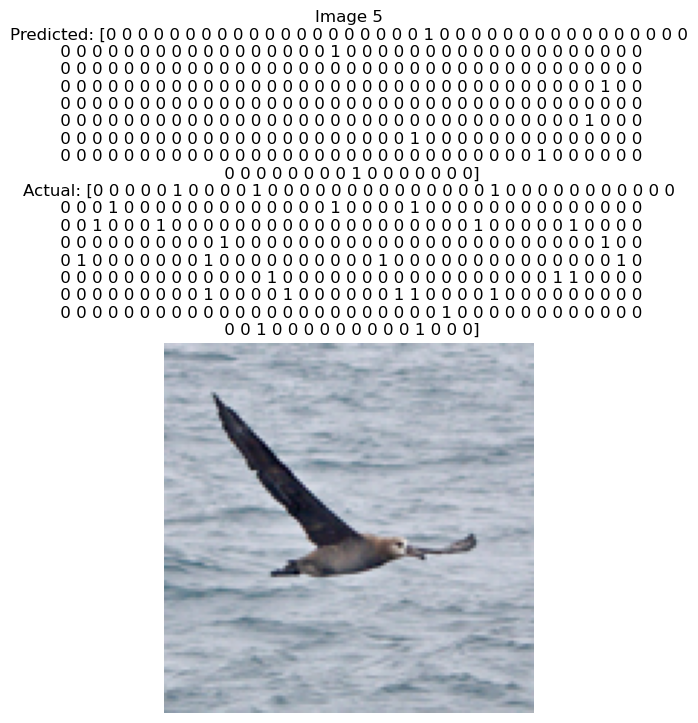

In [2]:
import matplotlib.pyplot as plt

# Visualize a few test images with predictions
def visualize_predictions(test_dataset, yhat, ytrue, num_images=5):
    for i in range(num_images):
        image, _ = test_dataset[i]
        image = image.permute(1, 2, 0).numpy()  # Convert back to (H, W, C) format
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Image {i + 1}\nPredicted: {yhat[i].astype(int)}\nActual: {ytrue[i].astype(int)}")
        plt.show()

visualize_predictions(test_dataset, yhat, ytrue)

In [18]:
# Load attributes from file
def load_attributes(attribute_file):
    with open(attribute_file, 'r') as file:
        attributes = [line.strip().split(' ', 1)[1] for line in file.readlines()]
    return attributes

# Path to attributes.txt
attribute_file = "../data/attributes.txt"
attributes = load_attributes(attribute_file)


In [ ]:
# Map binary predictions to attribute names
def map_predictions_to_attributes(predictions, attributes):
    mapped_attributes = []
    for pred in predictions:
        mapped = [attributes[i] for i in range(len(pred)) if pred[i] == 1]
        mapped_attributes.append(mapped)
    return mapped_attributes

# Example usage
predictions = np.array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])
mapped_attributes = map_predictions_to_attributes(predictions, attributes)
for i, attrs in enumerate(mapped_attributes):
    print(f"Image {i + 1}: {attrs}")


# From here


In [4]:
import torchvision.models as models
import torch.nn as nn
import torch
import os
import glob
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score
n_labels = 312
batch_size = 32
epochs = 5
learning_rate = 0.001
# Define modified ResNet model
class ResNetMultiLabel(nn.Module):
    def __init__(self, n_outputs):
        super(ResNetMultiLabel, self).__init__()
        # Load pre-trained ResNet
        self.resnet = models.resnet50(pretrained=True)
        # Replace the final fully connected layer
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, n_outputs),
            nn.Sigmoid()  # Multi-label classification
        )
    
    def forward(self, x):
        return self.resnet(x)
# Initialize ResNet model
model = ResNetMultiLabel(n_outputs=n_labels)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')  # Move to GPU if available
image_size = (224, 224)  # Required input size for ResNet
from torchvision import transforms

class ImageDataset(Dataset):
    def __init__(self, image_dir, label_file, image_size=(224, 224)):
        self.image_paths = self.get_image_paths(image_dir)
        self.labels = self.load_labels(label_file)
        self.transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ResNet
        ])
        assert len(self.image_paths) == len(self.labels), "Mismatch between images and labels."

    def get_image_paths(self, image_dir):
        image_paths = glob.glob(os.path.join(image_dir, "**", "*.jpg"), recursive=True)
        return sorted(image_paths)

    def load_labels(self, label_file):
        with open(label_file, 'r') as file:
            labels = [list(map(int, line.strip().split())) for line in file]
        return torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = self.transform(image)
        label = self.labels[idx]
        return image, label
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Training function
def train_model(model, train_loader, criterion, optimizer, epochs):
    model = model.to(device)
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")
from sklearn.metrics import precision_recall_fscore_support
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    yhat_list, ytrue_list = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            yhat = (outputs > 0.5).float()  # Convert probabilities to binary
            yhat_list.append(yhat.cpu().numpy())
            ytrue_list.append(labels.cpu().numpy())
    yhat = np.vstack(yhat_list)
    ytrue = np.vstack(ytrue_list)
    precision, recall, f1, support = precision_recall_fscore_support(ytrue, yhat, average='micro')
    print(f"Accuracy: {f1:.3f}")
    return yhat, ytrue
# Paths to data
train_image_dir = "../data/images/train"
train_label_file = "../data/attribute_matrix_train.txt"
test_image_dir = "../data/images/test"
test_label_file = "../data/attribute_matrix_test.txt"

# Hyperparameters
n_labels = 312
batch_size = 32
epochs = 1
learning_rate = 0.001

# Prepare datasets and dataloaders
train_dataset = ImageDataset(train_image_dir, train_label_file, image_size)
test_dataset = ImageDataset(test_image_dir, test_label_file, image_size)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss, and optimizer
model = ResNetMultiLabel(n_outputs=n_labels)
#label_counts = torch.sum(torch.stack([torch.sum(labels, dim=0) for _, labels in train_loader]), dim=0)
#print("Label counts:", label_counts)
#class_weights = label_counts.max() / (label_counts + 1e-6)
#criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights.to(device))
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs)


# Evaluate the model
yhat_list, ytrue_list = evaluate_model(model, test_loader)


Epoch 1/1, Loss: 0.2698
Accuracy: 0.160


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


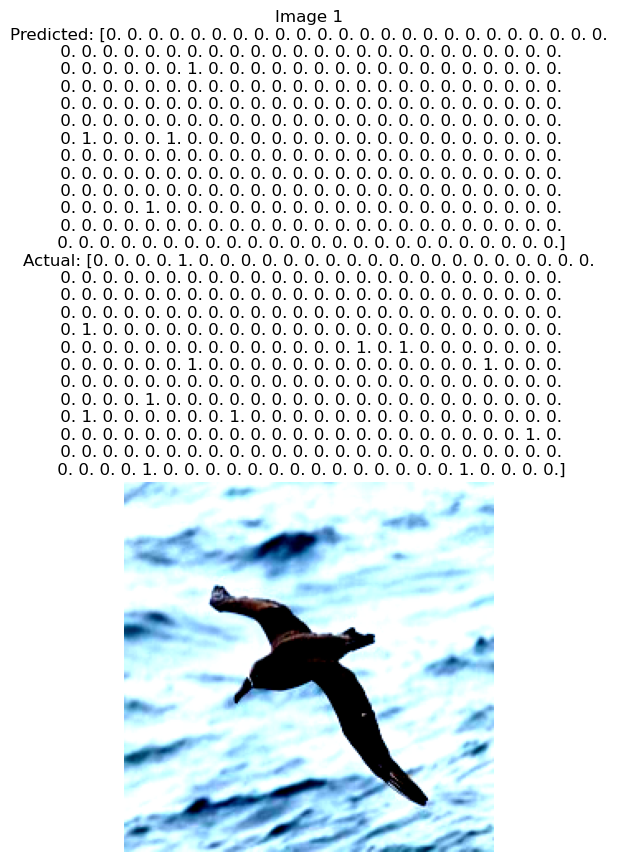

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


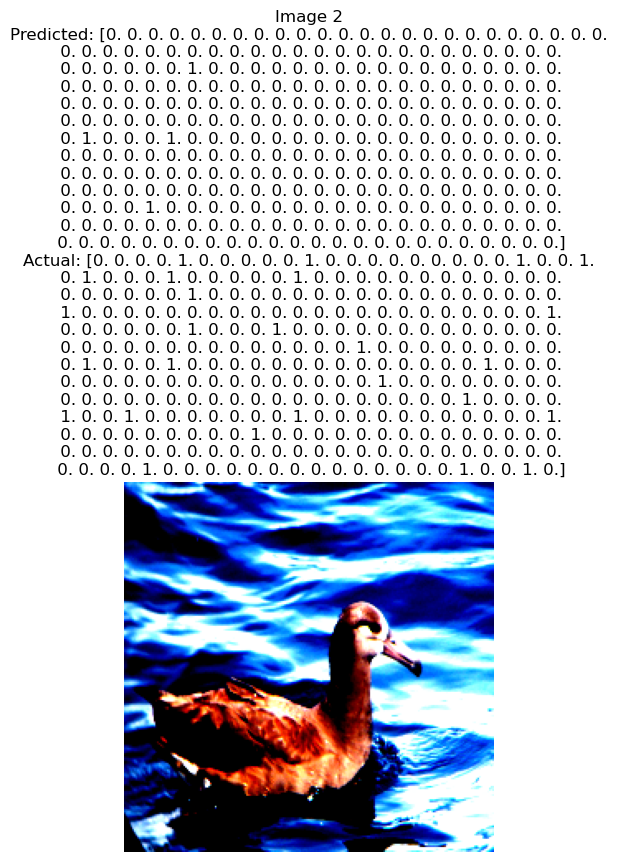

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


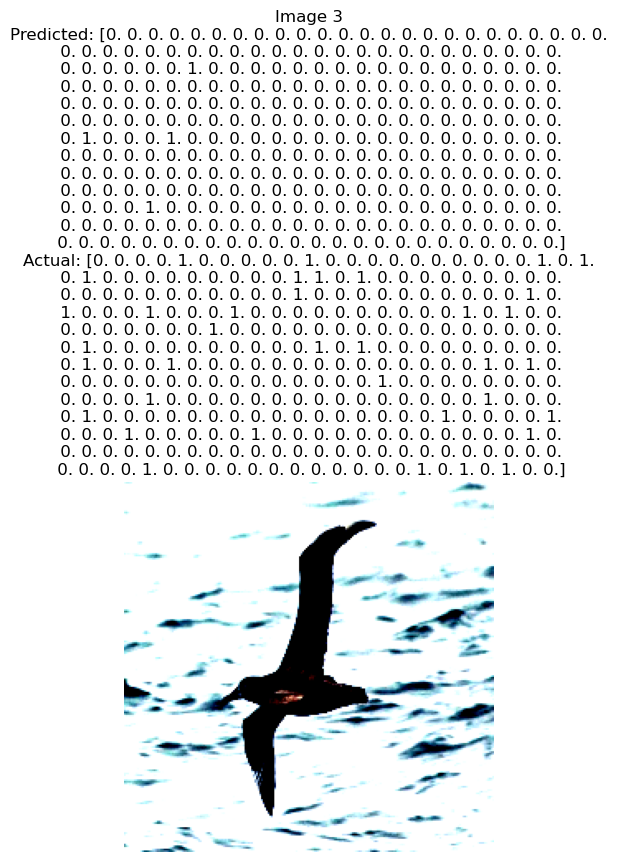

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


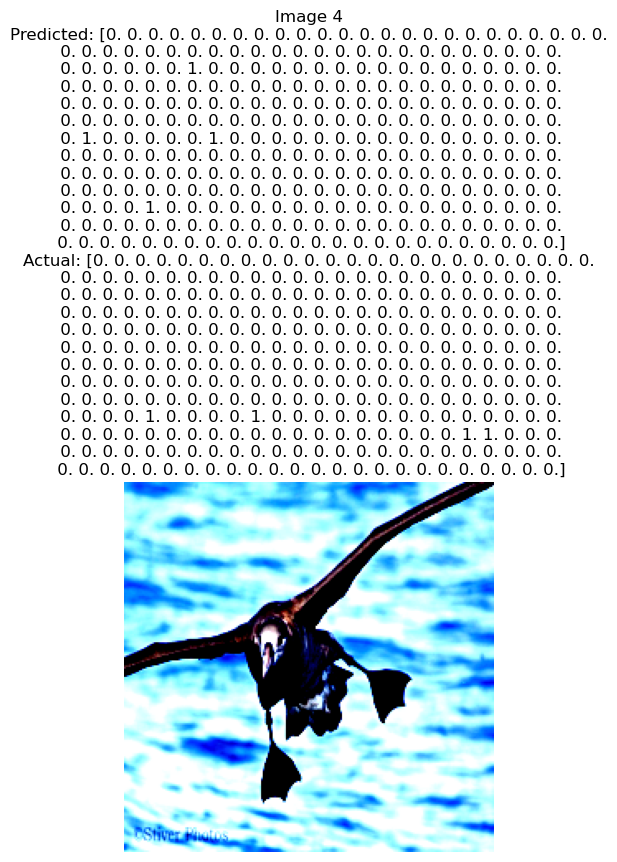

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


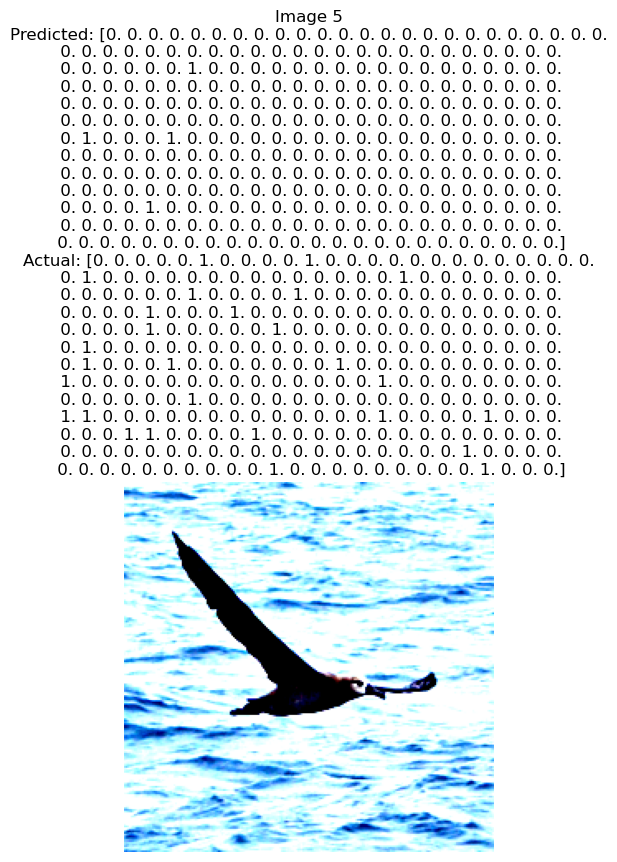

In [5]:
import matplotlib.pyplot as plt

# Visualize a few test images with predictions
def visualize_predictions(test_dataset, yhat, ytrue, num_images=5):
    for i in range(num_images):

        image, _ = test_dataset[i]
        image = image.permute(1, 2, 0).numpy()  # Convert back to (H, W, C) format
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Image {i + 1}\nPredicted: {yhat[i]}\nActual: {ytrue[i]}")
        plt.show()

visualize_predictions(test_dataset, yhat_list, ytrue_list)

In [19]:
def map_predictions_to_attributes(predictions, attributes):
    mapped_attributes = []
    for pred in predictions:
        mapped = [attributes[i] for i in range(len(pred)) if pred[i] == 1]
        mapped_attributes.append(mapped)
    return mapped_attributes

# Example usage

mapped_attributes = map_predictions_to_attributes(yhat_list, attributes)
for i, attrs in enumerate(mapped_attributes):
    print(f"Image {i + 1}: {attrs}")

Image 1: ['has_bill_shape::all-purpose', 'has_wing_color::black', 'has_underparts_color::yellow', 'has_breast_pattern::solid', 'has_breast_color::yellow', 'has_eye_color::black', 'has_bill_length::shorter_than_head', 'has_belly_color::yellow', 'has_size::small_(5_-_9_in)', 'has_shape::perching-like', 'has_belly_pattern::solid', 'has_primary_color::yellow']
Image 2: ['has_bill_shape::all-purpose', 'has_wing_color::black', 'has_underparts_color::yellow', 'has_breast_pattern::solid', 'has_breast_color::yellow', 'has_eye_color::black', 'has_bill_length::shorter_than_head', 'has_belly_color::yellow', 'has_size::small_(5_-_9_in)', 'has_shape::perching-like', 'has_belly_pattern::solid', 'has_primary_color::yellow']
